In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
# 1. Load the data
train_df = pd.read_csv('/content/fashion-mnist_test.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [5]:
# 2. Separate features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values

X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [6]:
# 3. Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# 4. Reshape to 28x28x1
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
# 5. Class names (Fashion MNIST)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# 6. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 7. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 8. Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.6282 - loss: 1.0382 - val_accuracy: 0.8235 - val_loss: 0.4753
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8231 - loss: 0.4602 - val_accuracy: 0.8717 - val_loss: 0.3607
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8701 - loss: 0.3694 - val_accuracy: 0.8773 - val_loss: 0.3320
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8746 - loss: 0.3415 - val_accuracy: 0.8987 - val_loss: 0.2847
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8973 - loss: 0.2840 - val_accuracy: 0.8947 - val_loss: 0.2873
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.8997 - loss: 0.2674 - val_accuracy: 0.9182 - val_loss: 0.2207
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9133 - loss: 0.2312 - val_accuracy: 0.9248 - val_loss: 0.2106
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.9219 - loss: 0.2181 - 

In [12]:
# 9. Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9321 - loss: 0.1783

Test Accuracy: 0.93


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


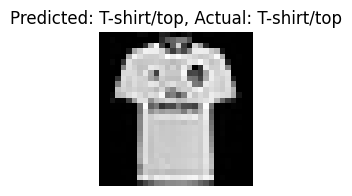

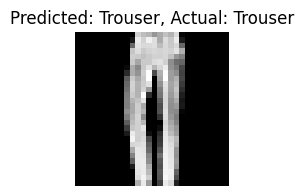

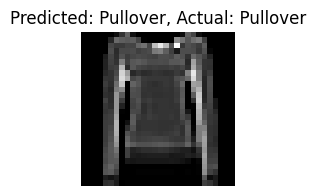

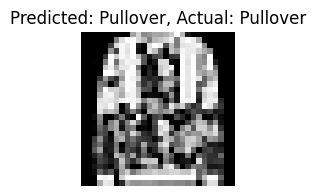

In [14]:
# 10. Predict and show example results with smaller image size
predictions = model.predict(X_test)

for i in range(5):
    plt.figure(figsize=(2, 2))  # Set small figure size (width, height)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()
